Running test case 0 with input '[[0.74199663, 0.17932039, 0.45677413], [0.28034464, 0.95989941], 0.999, 0.99, 0.98]'...
[0.6985510399093864, 0.3014489674613143]  =====  [0.08584767923415959, 0.9141523336414634]
3 names of gates  ['StatePrep', 'Identity', 'Identity', 'Conditional', 'Conditional', 'Conditional'] True
Correct!
Running test case 1 with input '[[0.09737041, 0.40230525, 0.64368839], [0.00111111, 0.99999938], 0.9, 0.95, 0.92]'...
[0.9332042390859381, 0.06679575324259307]  =====  [0.06629469110239884, 0.9337053066603161]
3 names of gates  ['StatePrep', 'Identity', 'Identity', 'Conditional', 'Conditional', 'Conditional'] True
Correct!


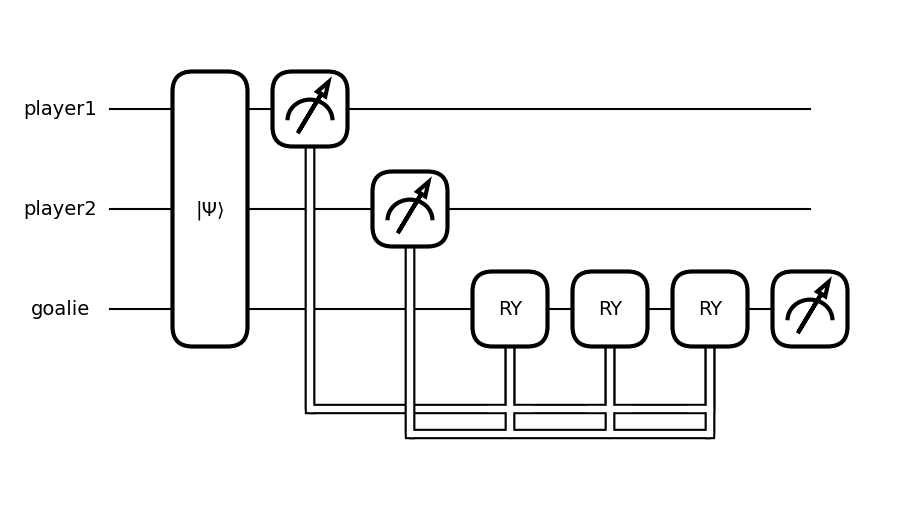

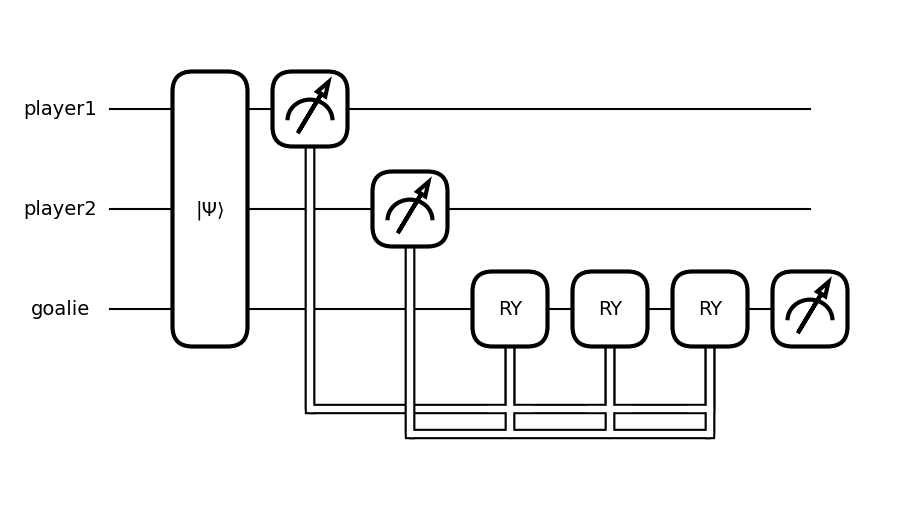

In [19]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=["player1", "player2", "goalie"])

def state_prep(player_coeffs, goalie_coeffs):
    alpha, beta, kappa = player_coeffs
    gamma, delta = goalie_coeffs
    coeffs = [kappa*gamma, kappa*delta, alpha*gamma, alpha*delta, beta*gamma, beta*delta, kappa*gamma, kappa*delta]
    qml.StatePrep(coeffs, wires=['player1', 'player2', 'goalie'])

@qml.qnode(dev)
def save_percentage(player_coeffs, goalie_coeffs, x, y, z):
    state_prep(player_coeffs, goalie_coeffs)
    pm1 = qml.measure('player1')
    pm2 = qml.measure('player2')

    gamma, delta = np.array(goalie_coeffs)

    def player_10():
        qml.RY(np.arccos(np.sqrt(x)*gamma)*2, wires='goalie')

    def player_01():
        qml.RY(np.arccos(np.sqrt(y)*gamma)*2, wires='goalie')

    def player_00_11():
        qml.RY(np.arcsin(np.sqrt(z)*delta)*2, wires='goalie')
        
    qml.cond(pm1 > pm2, player_10, None)()
    qml.cond(pm1 < pm2, player_01, None)()
    qml.cond(pm1 == pm2, player_00_11, None)()

    return qml.probs(wires="goalie")

def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    player_coeffs, goalie_coeffs, x, y, z = ins
    qml.draw_mpl(save_percentage)(player_coeffs, goalie_coeffs, x, y, z)
    output = save_percentage(player_coeffs, goalie_coeffs, x, y, z).tolist()
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    sp = solution_output
    _sp = json.loads(expected_output)
    print (sp, " ===== ",  _sp)
    ops = save_percentage.tape._ops
    num_ops = len(ops)
    num_cond = [op.name for op in ops].count('Conditional')
    names = [op.name for op in ops]
    state_prep_check = ('StatePrep' or 'MottonenStatePreparation' or 'AmplitudeEmbedding') in names
    print (num_cond, "names of gates ", names, ('StatePrep' or 'MottonenStatePreparation' or 'AmplitudeEmbedding') in names)
    # assert np.allclose(sp, _sp, rtol=1e-4), "Your calculated save percentage is incorrect."
    assert num_ops < 8, "You used more than 7 operations in your save_percentage function."
    assert num_ops > 2, "You definitely need more than 2 operations..."
    assert state_prep_check, "You can use StatePrep, MottonenStatePreparation, or AmplitudeEmbedding to prepare states."
    assert num_cond == 3, "You haven't used exactly 3 qml.cond operators."


# These are the public test cases
test_cases = [
    ('[[0.74199663, 0.17932039, 0.45677413], [0.28034464, 0.95989941], 0.999, 0.99, 0.98]', '[0.08584767923415959, 0.9141523336414634]'),
    ('[[0.09737041, 0.40230525, 0.64368839], [0.00111111, 0.99999938], 0.9, 0.95, 0.92]', '[0.06629469110239884, 0.9337053066603161]')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

In [20]:
dev = qml.device("default.qubit", wires=1)

p = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

print(' --> ', p**2)

def rotate_angle(prob, percent):
    angle = np.arccos(prob) - np.arccos(np.sqrt(percent)*prob)
    return -angle*2

def rotate_angle_inc(prob, percent):
    angle = np.arccos(prob) - np.arccos(np.sqrt(1+percent)*prob)
    return -angle*2  

@qml.qnode(dev)
def circuit():
    qml.AmplitudeEmbedding(p, wires=0)
    qml.RY(rotate_angle_inc(p[0], 0.25), wires=0)

    return qml.probs()

o = circuit()
print(o)

 -->  [0.5 0.5]
[0.625 0.375]


In [18]:
names = ['StatePrep', 'Identity', 'Identity', 'Conditional', 'Conditional', 'Conditional'] 
('StatePrep' or 'MottonenStatePreparation' or 'AmplitudeEmbedding') in names

True

In [41]:
!pip install pennylane --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.6 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: pennylane-lightning
    Found existing installation: PennyLane-Lightning 0.30.0
    Uninstalling PennyLane-Lightning-0.30.0:
      Successfully uninstalled PennyLane-Lightning-0.30.0
  Attempting uninstall: pennylane
    Found existing installation: PennyLane 0.30.0
    Uninstalling PennyLane-0.30.0:
      Successfully uninstalled PennyLane-0.30.0

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
